# Цель лабораторной работы
Изучить способы предварительной обработки данных для дальнейшего формирования моделей.<cite data-cite="ue:lab3"></cite>

# Задание
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:

- обработку пропусков в данных;
- кодирование категориальных признаков;
- масштабирование данных.

# Загрузка и первичный анализ данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks')

In [2]:
data = pd.read_csv('data/restaurant-scores-lives-standard.csv', sep=",")

In [14]:
original_size = data.shape
print("Исходный размер:")
print("\t- количество строк: %s" % original_size[0])
print("\t- количество столбцов: %s" % original_size[1])
total_count = original_size[0]

Исходный размер:
	- количество строк: 53686
	- количество столбцов: 17


In [11]:
# Первые 5 строк набора
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,70961,Our Lady of the Visitacion School,785 Sunnydale Ave,San Francisco,CA,94134,NaN,NaN,NaN,NaN,70961_20160321,2016-03-21T00:00:00,100.0,Routine - Unscheduled,NaN,NaN,NaN
1,10030,Marshall Elementary School,1575 15th St,San Francisco,CA,94103,37.766864,-122.419014,"{'latitude': '37.766864', 'human_address': '{""...",1.415525e+10,10030_20160321,2016-03-21T00:00:00,96.0,Routine - Unscheduled,10030_20160321_103120,Moderate risk food holding temperature,Moderate Risk
2,69006,Chipotle Mexican Grill #1566,50 California St,San Francisco,CA,94111,NaN,NaN,NaN,NaN,69006_20160321,2016-03-21T00:00:00,96.0,Routine - Unscheduled,69006_20160321_103148,No thermometers or uncalibrated thermometers,Low Risk
3,5868,LONGFELLOW ELEMENTARY SCHOOL,755 MORSE St,San Francisco,CA,94112,37.710459,-122.447713,"{'latitude': '37.710459', 'human_address': '{""...",1.415546e+10,5868_20160321,2016-03-21T00:00:00,87.0,Routine - Unscheduled,5868_20160321_103154,Unclean or degraded floors walls or ceilings,Low Risk
4,5864,VISITACION VALLEY MIDDLE SCHOOL,450 Raymond Ave,San Francisco,CA,94134,37.714428,-122.411433,"{'latitude': '37.714428', 'human_address': '{""...",NaN,5864_20160321,2016-03-21T00:00:00,94.0,Routine - Unscheduled,5864_20160321_103157,Food safety certificate or food handler card n...,Low Risk


In [12]:
# Типы колонок
data.dtypes

business_id                int64
business_name             object
business_address          object
business_city             object
business_state            object
business_postal_code      object
business_latitude        float64
business_longitude       float64
business_location         object
business_phone_number    float64
inspection_id             object
inspection_date           object
inspection_score         float64
inspection_type           object
violation_id              object
violation_description     object
risk_category             object
dtype: object

In [13]:
# Количество пропущенных значений в каждой колонке
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1241
business_latitude        24005
business_longitude       24005
business_location        24005
business_phone_number    36989
inspection_id                0
inspection_date              0
inspection_score         13947
inspection_type              0
violation_id             12946
violation_description    12946
risk_category            12946
dtype: int64

# Обработка пропусков в данных

Рассматриваются колонки категориальных и количественных признаков, содержащих пропуски в данных.

Требуется выбрать одну колонку категориального признака и одну колонку количественного признака и произвести обработку пропусков в каждой из них.

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

## Для категориального признака

In [15]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_postal_code. Тип данных object. Количество пустых значений 1241, 2.31%.
Колонка business_location. Тип данных object. Количество пустых значений 24005, 44.71%.
Колонка violation_id. Тип данных object. Количество пустых значений 12946, 24.11%.
Колонка violation_description. Тип данных object. Количество пустых значений 12946, 24.11%.
Колонка risk_category. Тип данных object. Количество пустых значений 12946, 24.11%.


In [34]:
# Фильтр по колонкам с пропущенными значениями
data_cat = data[cat_cols]
data_cat

,business_postal_code,business_location,violation_id,violation_description,risk_category
0,94134,NaN,NaN,NaN,NaN
1,94103,"{'latitude': '37.766864', 'human_address': '{""...",10030_20160321_103120,Moderate risk food holding temperature,Moderate Risk
2,94111,NaN,69006_20160321_103148,No thermometers or uncalibrated thermometers,Low Risk
3,94112,"{'latitude': '37.710459', 'human_address': '{""...",5868_20160321_103154,Unclean or degraded floors walls or ceilings,Low Risk
4,94134,"{'latitude': '37.714428', 'human_address': '{""...",5864_20160321_103157,Food safety certificate or food handler card n...,Low Risk
5,94103,"{'latitude': '37.766618', 'human_address': '{""...",5998_20160321_103109,Unclean or unsanitary food contact surfaces,High Risk
6,94109,"{'latitude': '37.794298', 'human_address': '{""...",NaN,NaN,NaN
7,94109,"{'latitude': '37.792854', 'human_address': '{""...",NaN,NaN,NaN
8,94121,"{'latitude': '37.772323', 'human_address': '{""...",NaN,NaN,NaN
9,94134,"{'latitude': '37.714428', 'human_address': '{""...",5864_20160321_103144,Unapproved or unmaintained equipment or utensils,Low Risk


В качестве рассматриваемого категориального признака, имеющего пропуски, выбран столбец "business_postal_code".

Обработка пропусков производится по стратегии импьютации постоянным значением.

In [31]:
cat_temp_data = data[['business_postal_code']]
cat_temp_data

,business_postal_code
0,94134
1,94103
2,94111
3,94112
4,94134
5,94103
6,94109
7,94109
8,94121
9,94134


In [26]:
# Количество пропущенных значений в колонке
cat_temp_data[cat_temp_data['business_postal_code'].isnull()].shape[0]

1241

In [19]:
cat_temp_data['business_postal_code'].unique()

array(['94134', '94103', '94111', '94112', '94109', '94121', '94110',
       '94102', '94116', '94117', '94122', '94131', '94115', '94118',
       '94132', '94114', '94127', '94104', '94123', nan, '94108', '94133',
       '94107', '94124', '94105', '94013', '941033148', '94158', 'Ca',
       '94143', '95105', '94101', '94120', '94130', '941102019', '941',
       '92672', 'CA', '94014', '94129', '94080', '00000', '94544', '94301',
       '94901', '94402', '94188', '95109', '94621', '95133', '64110',
       '95122', '94602', '94102-5917', '94124-1917', '95117', '95132'], dtype=object)

In [43]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='None')
data_imp3 = imp3.fit_transform(cat_temp_data)

In [41]:
np.unique(data_imp3)

array(['00000', '64110', '92672', '94013', '94014', '94080', '941',
       '94101', '94102', '94102-5917', '94103', '941033148', '94104',
       '94105', '94107', '94108', '94109', '94110', '941102019', '94111',
       '94112', '94114', '94115', '94116', '94117', '94118', '94120',
       '94121', '94122', '94123', '94124', '94124-1917', '94127', '94129',
       '94130', '94131', '94132', '94133', '94134', '94143', '94158',
       '94188', '94301', '94402', '94544', '94602', '94621', '94901',
       '95105', '95109', '95117', '95122', '95132', '95133', 'CA', 'Ca',
       'None'], dtype=object)

In [25]:
# Количество обработанных значений
data_cat_const[data_cat_const=='None'].size

1241

## Для количественного признака

In [27]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка business_latitude. Тип данных float64. Количество пустых значений 24005, 44.71%.
Колонка business_longitude. Тип данных float64. Количество пустых значений 24005, 44.71%.
Колонка business_phone_number. Тип данных float64. Количество пустых значений 36989, 68.9%.
Колонка inspection_score. Тип данных float64. Количество пустых значений 13947, 25.98%.


In [28]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,business_latitude,business_longitude,business_phone_number,inspection_score
0,NaN,NaN,NaN,100.0
1,37.766864,-122.419014,1.415525e+10,96.0
2,NaN,NaN,NaN,96.0
3,37.710459,-122.447713,1.415546e+10,87.0
4,37.714428,-122.411433,NaN,94.0
5,37.766618,-122.421263,1.415587e+10,87.0
6,37.794298,-122.421387,NaN,NaN
7,37.792854,-122.416114,NaN,NaN
8,37.772323,-122.509946,NaN,NaN
9,37.714428,-122.411433,NaN,94.0


В качестве рассматриваемого количественного признака, имеющего пропуски, выбран столбец "inspection_score".

Обработка пропусков производится по стратегии импьютации наиболее частыми значениями.

In [37]:
num_temp_data = data[['inspection_score']]
num_temp_data

,inspection_score
0,100.0
1,96.0
2,96.0
3,87.0
4,94.0
5,87.0
6,NaN
7,NaN
8,NaN
9,94.0


In [38]:
# Количество пропущенных значений в колонке
num_temp_data[num_temp_data['inspection_score'].isnull()].shape[0]

13947

In [39]:
num_temp_data['inspection_score'].unique()

array([ 100.,   96.,   87.,   94.,   nan,   85.,   92.,   88.,   90.,
         98.,   83.,   76.,   80.,   93.,   57.,   91.,   68.,   86.,
         77.,   84.,   89.,   81.,   82.,   73.,   74.,   75.,   71.,
         79.,   78.,   69.,   72.,   70.,   63.,   67.,   61.,   66.,
         65.,   55.,   56.,   64.,   59.,   62.,   53.,   60.,   48.,
         58.,   45.,   51.,   54.])

In [56]:
# Функция для импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
#    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]
    return data_num_imp, column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [57]:
data[['inspection_score']].describe()

,inspection_score
count,39739.000000
mean,85.984071
std,8.647772
min,45.000000
25%,81.000000
50%,87.000000
75%,92.000000
max,100.000000


In [58]:
data_num_imp = test_num_impute_col(data, 'inspection_score', 'most_frequent')
data_num_imp

(array([[ 100.],
        [  96.],
        [  96.],
        ..., 
        [  89.],
        [  85.],
        [  90.]]), 'inspection_score', 'most_frequent', 13947, 90.0, 90.0)

### Визуализация

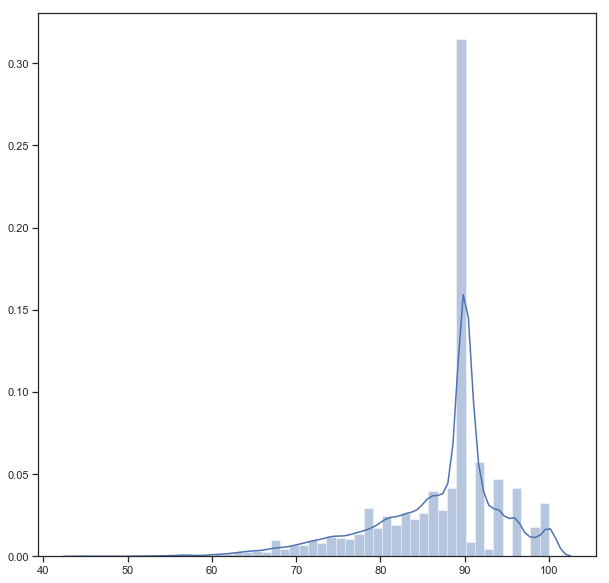

In [60]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data_num_imp[0])